In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from scipy.io import loadmat

In [3]:
mat = loadmat('nirbeer.mat')

In [7]:
type(mat)

dict

In [185]:
Xcal = mat['Xcal']
Xtest = mat['Xtest']
features = mat['xaxis']
ycal = mat['ycal']
ytest = mat['ytest']

In [186]:
series = []
for i in range(Xcal.shape[1]):
    series.append(pd.Series(Xcal[:, i]))
len(series)

926

In [187]:
data = pd.DataFrame()

In [188]:
for i in range(features.shape[1]):
    data[features[0, i]] = series[i]

In [190]:
data.head()

,400,402,404,406,408,410,412,414,416,418,...,2232,2234,2236,2238,2240,2242,2244,2246,2248,2250
0,0.809228,0.839166,0.857076,0.874258,0.884267,0.898585,0.904815,0.905194,0.903488,0.902187,...,3.679895,3.654557,3.653983,3.714209,3.669642,3.625521,3.647152,3.573585,3.623088,3.679775
1,0.804006,0.826189,0.847709,0.865769,0.877828,0.888752,0.893231,0.894017,0.893292,0.891371,...,3.632740,3.738945,3.601677,3.592955,3.606268,3.657218,3.632019,3.660901,3.635919,3.671539
2,0.739626,0.762493,0.775604,0.782518,0.788167,0.795419,0.795223,0.793878,0.790986,0.785020,...,3.563812,3.622122,3.617598,3.652315,3.590150,3.710362,3.630672,3.653063,3.566837,3.704355
3,0.699460,0.713531,0.724313,0.731107,0.736592,0.735468,0.734549,0.731744,0.726163,0.718673,...,3.583575,3.620621,3.682378,3.681044,3.650404,3.645983,3.633222,3.668727,3.650432,3.687260
4,0.702702,0.716579,0.729258,0.736214,0.741270,0.742020,0.740587,0.737819,0.732221,0.723229,...,3.650906,3.728940,3.614735,3.618842,3.656746,3.622961,3.560679,3.710902,3.653769,3.663029


## Plotting the data

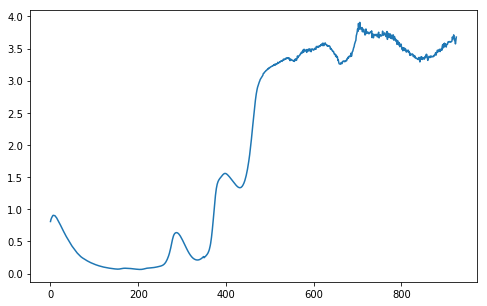

In [204]:
# Plotting  the first data
%matplotlib inline
plt.figure(figsize=(8, 5))
plt.plot(Xcal[0])

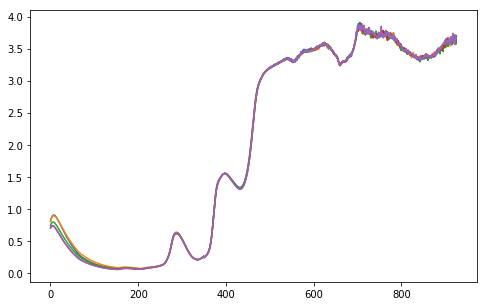

In [203]:
#Plotting the first 5 data points
plt.figure(figsize=(8, 5))
for i in range(5):
    plt.plot(Xcal[i])